In [1]:
from pandas import read_csv
import numpy 
from matplotlib import pyplot
import seaborn as sns
from sklearn import preprocessing as pre
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import SVR
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import statsmodels.api as sm
from sklearn import metrics
import random
import csv

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
series = read_csv('output2nd.csv')
X = series.values
print(series.columns)
print(series)
print(series.describe())

Index(['Month', 'Fuel Oil Consumption(Predicted)',
       'Cooling Degree Days U.S. Average', 'Heating Degree Days U.S. Average ',
       'Fuel Oil Consumption(Actual)'],
      dtype='object')
     Month  Fuel Oil Consumption(Predicted)  Cooling Degree Days U.S. Average  \
0        1                         0.894624                                 7   
1        2                         1.049869                                 8   
2        3                         0.640267                                29   
3        4                         0.428591                                29   
4        5                         0.396877                               135   
5        6                         0.297866                               202   
6        7                         0.400244                               294   
7        8                         0.373951                               248   
8        9                         0.449943                               171 

[ 0.97  0.84  0.63  0.49  0.35  0.34  0.32  0.36  0.39  0.46  0.55  0.73
  0.79  0.75  0.65  0.42  0.38  0.35  0.3   0.37  0.38  0.41  0.54  0.73
  0.7   0.75  0.65  0.39  0.32  0.28  0.26  0.3   0.3   0.37  0.44  0.49
  0.74  0.92  0.66  0.47  0.32  0.25  0.22  0.24  0.23  0.29  0.46  0.63
  0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7
  0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61
  0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68
  0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49
  0.61  0.51  0.32  0.19  0.14  0.1   0.09  0.11  0.13  0.22  0.39  0.48
  0.66  0.61  0.44  0.27  0.14  0.1   0.1   0.11  0.15  0.24  0.39  0.58
  0.74  0.67  0.51  0.25  0.13  0.1   0.11  0.12  0.19  0.26  0.44  0.57
  0.71  0.83  0.49  0.27  0.15  0.1   0.1   0.12  0.18  0.29  0.35  0.45
  0.63  0.62  0.38  0.26  0.16  0.1   0.08  0.11  0.15  0.25  0.35  0.59
  0.61  0.52  0.47  0.23  0.16  0.12  0.1   0.12  0.

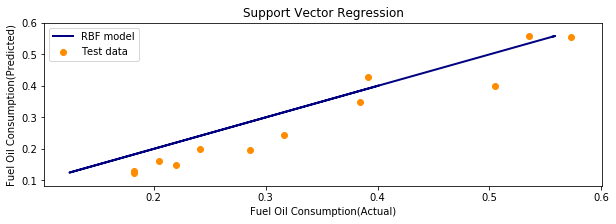

Mean Squared Error(MSE): 0.003550


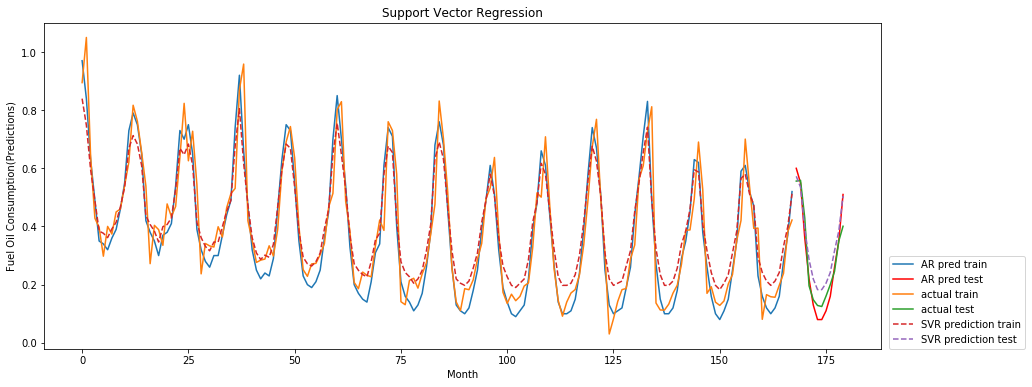

In [3]:
n_train = 168
features=series['Fuel Oil Consumption(Actual)'].values
target=series['Fuel Oil Consumption(Predicted)'].values

X_train, X_test = features[:n_train], features[n_train:]
print(X_train)
print(X_test)
    
y_train, y_test = target[:n_train], target[n_train:]
print( y_train)
print(y_test)
svr = svm.SVR(kernel="rbf", gamma=0.1)
svr.fit(X_train.reshape(-1,1),y_train)
y_pred = svr.predict(X_test.reshape(-1,1))
print(y_pred)
y_pred_train = svr.predict(X_train.reshape(-1,1))
pyplot.figure(figsize=(10, 3))
lw=2
#pyplot.scatter(X_test.reshape(-1,1),y_test.reshape(-1,1).ravel(),color='darkorange',label='Test data')
#pyplot.plot(X_test.reshape(-1,1),y_pred,color='navy',lw=lw,label='RBF model')
pyplot.scatter(y_pred.reshape(-1,1),y_test.reshape(-1,1).ravel(),color='darkorange',label='Test data')
pyplot.plot(y_test.reshape(-1,1),y_test,color='navy',lw=lw,label='RBF model')
pyplot.ylabel('Fuel Oil Consumption(Predicted)')
pyplot.xlabel('Fuel Oil Consumption(Actual)')
pyplot.title('Support Vector Regression')
pyplot.legend()
pyplot.show()
pyplot.plot(range(n_train),X_train,label="AR pred train")
pyplot.plot(range(n_train, len(X_test) + n_train),X_test,color='red',label="AR pred test")
pyplot.plot(range(n_train), y_train, label="actual train")
pyplot.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="actual test")
pyplot.plot(range(n_train), y_pred_train, '--', label="SVR prediction train")
pyplot.plot(range(n_train, len(y_test) + n_train), y_pred, '--',label="SVR prediction test")
pyplot.legend(loc=(1.01, 0))
pyplot.xlabel("Month")
pyplot.ylabel("Fuel Oil Consumption(Predictions)")
pyplot.title("Support Vector Regression")
error = mean_squared_error(y_test,y_pred)
print('Mean Squared Error(MSE): %.6f' % error)

In [4]:
values1=series['Cooling Degree Days U.S. Average'].values
values1=values1.reshape((len(values1),1))

In [5]:
# train the normalization
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler1 = scaler1.fit(values1)
print('Min: %f, Max: %f' % (scaler1.data_min_, scaler1.data_max_))

Min: 3.000000, Max: 404.000000


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
normalized1= scaler1.transform(values1)
with open("output3.csv", 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for i in range(180):
        print(normalized1[i])
        wr.writerow(normalized1[i])

[ 0.00997506]
[ 0.01246883]
[ 0.06483791]
[ 0.06483791]
[ 0.32917706]
[ 0.49625935]
[ 0.72568579]
[ 0.61097257]
[ 0.41895262]
[ 0.16209476]
[ 0.03990025]
[ 0.0074813]
[ 0.01995012]
[ 0.01496259]
[ 0.02743142]
[ 0.05486284]
[ 0.19950125]
[ 0.60099751]
[ 0.90274314]
[ 0.85286783]
[ 0.51371571]
[ 0.13216958]
[ 0.04488778]
[ 0.0074813]
[ 0.02743142]
[ 0.0074813]
[ 0.04488778]
[ 0.12967581]
[ 0.26433915]
[ 0.57356608]
[ 0.94513716]
[ 0.81296758]
[ 0.32668329]
[ 0.10972569]
[ 0.02992519]
[ 0.02493766]
[ 0.02244389]
[ 0.00997506]
[ 0.0723192]
[ 0.05486284]
[ 0.28678304]
[ 0.57107232]
[ 0.75810474]
[ 0.89526185]
[ 0.45885287]
[ 0.19451372]
[ 0.03740648]
[ 0.02743142]
[ 0.01246883]
[ 0.02493766]
[ 0.04239401]
[ 0.0723192]
[ 0.2244389]
[ 0.64588529]
[ 0.81795511]
[ 0.69326683]
[ 0.41895262]
[ 0.11471322]
[ 0.02493766]
[ 0.01745636]
[ 0.01246883]
[ 0.01246883]
[ 0.04239401]
[ 0.06982544]
[ 0.28678304]
[ 0.54613466]
[ 0.70573566]
[ 0.74812968]
[ 0.41396509]
[ 0.11471322]
[ 0.03740648]
[ 0.01246883

In [7]:
values2= series['Heating Degree Days U.S. Average '].values
values2= values2.reshape((len(values2),1))

In [8]:
# train the normalization
scaler2 = MinMaxScaler(feature_range=(0, 1))
scaler2 = scaler2.fit(values2)
print('Min: %f, Max: %f' % (scaler2.data_min_, scaler2.data_max_))

Min: 3.000000, Max: 970.000000


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
normalized2= scaler2.transform(values2)
with open("output33.csv", 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for i in range(180):
        print(normalized2[i])
        wr.writerow(normalized2[i])

[ 0.99793175]
[ 0.78903826]
[ 0.51189245]
[ 0.31954498]
[ 0.11789038]
[ 0.03929679]
[ 0.00620476]
[ 0.0196484]
[ 0.05170631]
[ 0.26577042]
[ 0.51085832]
[ 0.8262668]
[ 0.88107549]
[ 0.69389866]
[ 0.66597725]
[ 0.32264736]
[ 0.19544984]
[ 0.02895553]
[ 0.00103413]
[ 0.00517063]
[ 0.04136505]
[ 0.24819028]
[ 0.4860393]
[ 0.8893485]
[ 0.70837642]
[ 0.74560496]
[ 0.6204757]
[ 0.28128232]
[ 0.14477766]
[ 0.0237849]
[ 0.]
[ 0.00930714]
[ 0.0868666]
[ 0.31851086]
[ 0.48914168]
[ 0.71251293]
[ 0.8655636]
[ 0.8655636]
[ 0.5139607]
[ 0.38366081]
[ 0.11892451]
[ 0.02585315]
[ 0.0041365]
[ 0.00620476]
[ 0.04860393]
[ 0.18614271]
[ 0.53671148]
[ 0.8221303]
[ 0.9131334]
[ 0.75077559]
[ 0.62874871]
[ 0.33402275]
[ 0.19234747]
[ 0.02792141]
[ 0.0041365]
[ 0.01240951]
[ 0.05480869]
[ 0.29058945]
[ 0.55015512]
[ 0.85108583]
[ 0.9803516]
[ 0.71458118]
[ 0.59462254]
[ 0.34229576]
[ 0.13857291]
[ 0.04239917]
[ 0.01240951]
[ 0.01240951]
[ 0.06101344]
[ 0.34022751]
[ 0.45915202]
[ 0.89762151]
[ 0.95553257]
[

In [2]:
series = read_csv('output3rd.csv')
X1 = series.values
print(series.columns)
print(series)
print(series.describe())

Index(['Month', 'Fuel Oil Consumption(Predicted)',
       'Cooling Degree Days U.S. Average', 'Heating Degree Days U.S. Average ',
       'Fuel Oil Consumption(Actual)'],
      dtype='object')
     Month  Fuel Oil Consumption(Predicted)  Cooling Degree Days U.S. Average  \
0        1                         0.894624                          0.009975   
1        2                         1.049869                          0.012469   
2        3                         0.640267                          0.064838   
3        4                         0.428591                          0.064838   
4        5                         0.396877                          0.329177   
5        6                         0.297866                          0.496259   
6        7                         0.400244                          0.725686   
7        8                         0.373951                          0.610973   
8        9                         0.449943                          0.418953 

[ 0.00997506  0.01246883  0.06483791  0.06483791  0.32917706  0.49625935
  0.72568579  0.61097257  0.41895262  0.16209476  0.03990025  0.0074813
  0.01995012  0.01496259  0.02743142  0.05486284  0.19950125  0.60099751
  0.90274314  0.85286783  0.51371571  0.13216958  0.04488778  0.0074813
  0.02743142  0.0074813   0.04488778  0.12967581  0.26433915  0.57356608
  0.94513716  0.81296758  0.32668329  0.10972569  0.02992519  0.02493766
  0.02244389  0.00997506  0.0723192   0.05486284  0.28678304  0.57107232
  0.75810474  0.89526185  0.45885287  0.19451372  0.03740648  0.02743142
  0.01246883  0.02493766  0.04239402  0.0723192   0.2244389   0.64588529
  0.81795511  0.69326683  0.41895262  0.11471322  0.02493766  0.01745636
  0.01246883  0.01246883  0.04239402  0.06982544  0.28678304  0.54613466
  0.70573566  0.74812968  0.41396509  0.11471322  0.03740648  0.01246883
  0.00249377  0.          0.01496259  0.08229426  0.3117207   0.69825436
  0.9276808   0.86783042  0.47880299  0.12967581  0.0

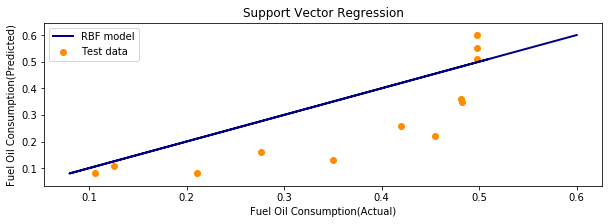

Mean Squared Error(MSE): 0.017225


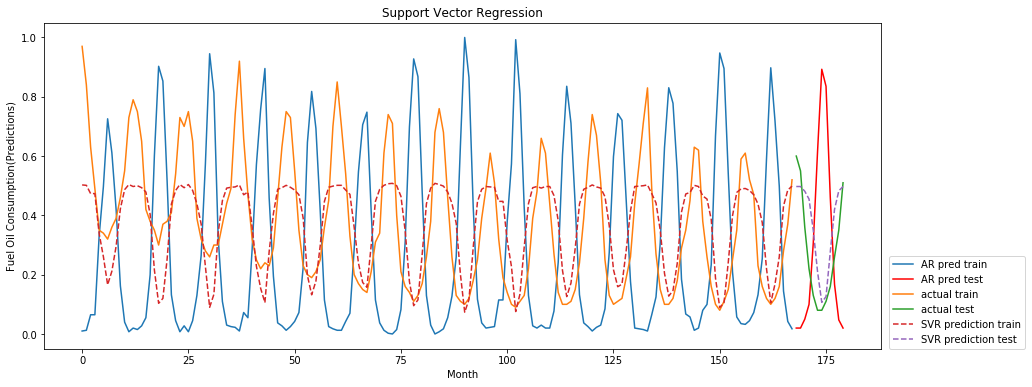

In [3]:
n_train = 168
features=series['Cooling Degree Days U.S. Average'].values
target=series['Fuel Oil Consumption(Actual)'].values

X_train, X_test = features[:n_train], features[n_train:]
print(X_train)
print(X_test)
    
y_train, y_test = target[:n_train], target[n_train:]
print( y_train)
print(y_test)
svr = svm.SVR(kernel="rbf", gamma=0.1)
svr.fit(X_train.reshape(-1,1),y_train)
y_pred = svr.predict(X_test.reshape(-1,1))
print(y_pred)
y_pred_train = svr.predict(X_train.reshape(-1,1))
pyplot.figure(figsize=(10, 3))
lw=2
#pyplot.scatter(X_test.reshape(-1,1),y_test.reshape(-1,1).ravel(),color='darkorange',label='Test data')
#pyplot.plot(X_test.reshape(-1,1),y_pred,color='navy',lw=lw,label='RBF model')
pyplot.scatter(y_pred.reshape(-1,1),y_test.reshape(-1,1).ravel(),color='darkorange',label='Test data')
pyplot.plot(y_test.reshape(-1,1),y_test,color='navy',lw=lw,label='RBF model')
pyplot.ylabel('Fuel Oil Consumption(Predicted)')
pyplot.xlabel('Fuel Oil Consumption(Actual)')
pyplot.title('Support Vector Regression')
pyplot.legend()
pyplot.show()
pyplot.plot(range(n_train),X_train,label="AR pred train")
pyplot.plot(range(n_train, len(X_test) + n_train),X_test,color='red',label="AR pred test")
pyplot.plot(range(n_train), y_train, label="actual train")
pyplot.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="actual test")
pyplot.plot(range(n_train), y_pred_train, '--', label="SVR prediction train")
pyplot.plot(range(n_train, len(y_test) + n_train), y_pred, '--',label="SVR prediction test")
pyplot.legend(loc=(1.01, 0))
pyplot.xlabel("Month")
pyplot.ylabel("Fuel Oil Consumption(Predictions)")
pyplot.title("Support Vector Regression")
error = mean_squared_error(y_test,y_pred)
print('Mean Squared Error(MSE): %.6f' % error)

In [2]:
series = read_csv('output3rdformat.csv')
X1 = series.values
print(series.columns)
print(series)
print(series.describe())

Index(['Month', 'Fuel Oil Consumption(Predicted)',
       'Cooling Degree Days U.S. Average', 'Heating Degree Days U.S. Average ',
       'Fuel Oil Consumption(Actual)'],
      dtype='object')
     Month  Fuel Oil Consumption(Predicted)  Cooling Degree Days U.S. Average  \
0        1                         0.894624                          0.003067   
1        2                         1.049869                          0.009975   
2        3                         0.640267                          0.012469   
3        4                         0.428591                          0.064838   
4        5                         0.396877                          0.064838   
5        6                         0.297866                          0.329177   
6        7                         0.400244                          0.496259   
7        8                         0.373951                          0.725686   
8        9                         0.449943                          0.610973 

[ 0.00306748  0.00997506  0.01246883  0.06483791  0.06483791  0.32917706
  0.49625935  0.72568579  0.61097257  0.41895262  0.16209476  0.03990025
  0.0074813   0.01995012  0.01496259  0.02743142  0.05486284  0.19950125
  0.60099751  0.90274314  0.85286783  0.51371571  0.13216958  0.04488778
  0.0074813   0.02743142  0.0074813   0.04488778  0.12967581  0.26433915
  0.57356608  0.94513716  0.81296758  0.32668329  0.10972569  0.02992519
  0.02493766  0.02244389  0.00997506  0.0723192   0.05486284  0.28678304
  0.57107232  0.75810474  0.89526185  0.45885287  0.19451372  0.03740648
  0.02743142  0.01246883  0.02493766  0.04239402  0.0723192   0.2244389
  0.64588529  0.81795511  0.69326683  0.41895262  0.11471322  0.02493766
  0.01745636  0.01246883  0.01246883  0.04239402  0.06982544  0.28678304
  0.54613466  0.70573566  0.74812968  0.41396509  0.11471322  0.03740648
  0.01246883  0.00249377  0.          0.01496259  0.08229426  0.3117207
  0.69825436  0.9276808   0.86783042  0.47880299  0.1

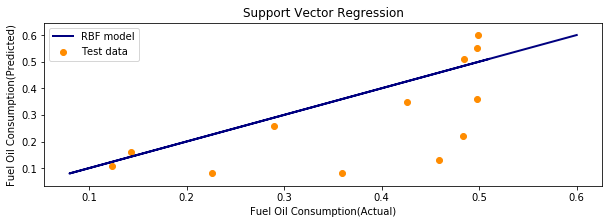

Mean Squared Error(MSE): 0.026367


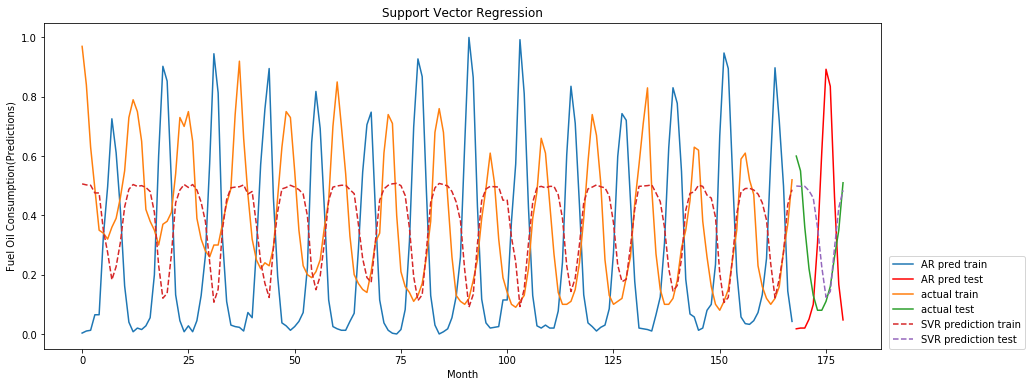

In [3]:
n_train = 168
features=series['Cooling Degree Days U.S. Average'].values
target=series['Fuel Oil Consumption(Actual)'].values

X_train, X_test = features[:n_train], features[n_train:]
print(X_train)
print(X_test)
    
y_train, y_test = target[:n_train], target[n_train:]
print( y_train)
print(y_test)
svr = svm.SVR(kernel="rbf", gamma=0.1)
svr.fit(X_train.reshape(-1,1),y_train)
y_pred = svr.predict(X_test.reshape(-1,1))
print(y_pred)
y_pred_train = svr.predict(X_train.reshape(-1,1))
pyplot.figure(figsize=(10, 3))
lw=2
#pyplot.scatter(X_test.reshape(-1,1),y_test.reshape(-1,1).ravel(),color='darkorange',label='Test data')
#pyplot.plot(X_test.reshape(-1,1),y_pred,color='navy',lw=lw,label='RBF model')
pyplot.scatter(y_pred.reshape(-1,1),y_test.reshape(-1,1).ravel(),color='darkorange',label='Test data')
pyplot.plot(y_test.reshape(-1,1),y_test,color='navy',lw=lw,label='RBF model')
pyplot.ylabel('Fuel Oil Consumption(Predicted)')
pyplot.xlabel('Fuel Oil Consumption(Actual)')
pyplot.title('Support Vector Regression')
pyplot.legend()
pyplot.show()
pyplot.plot(range(n_train),X_train,label="AR pred train")
pyplot.plot(range(n_train, len(X_test) + n_train),X_test,color='red',label="AR pred test")
pyplot.plot(range(n_train), y_train, label="actual train")
pyplot.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="actual test")
pyplot.plot(range(n_train), y_pred_train, '--', label="SVR prediction train")
pyplot.plot(range(n_train, len(y_test) + n_train), y_pred, '--',label="SVR prediction test")
pyplot.legend(loc=(1.01, 0))
pyplot.xlabel("Month")
pyplot.ylabel("Fuel Oil Consumption(Predictions)")
pyplot.title("Support Vector Regression")
error = mean_squared_error(y_test,y_pred)
print('Mean Squared Error(MSE): %.6f' % error)

In [4]:
series1 = read_csv('output3rdformat.csv')
X1 = series1.values
print(series1.columns)
print(series1)
print(series1.describe())

Index(['Month', 'Fuel Oil Consumption(Predicted)',
       'Cooling Degree Days U.S. Average', 'Heating Degree Days U.S. Average ',
       'Fuel Oil Consumption(Actual)'],
      dtype='object')
     Month  Fuel Oil Consumption(Predicted)  Cooling Degree Days U.S. Average  \
0        1                         0.894624                          0.003067   
1        2                         1.049869                          0.009975   
2        3                         0.640267                          0.012469   
3        4                         0.428591                          0.064838   
4        5                         0.396877                          0.064838   
5        6                         0.297866                          0.329177   
6        7                         0.400244                          0.496259   
7        8                         0.373951                          0.725686   
8        9                         0.449943                          0.610973 

In [5]:
y1= series1['Fuel Oil Consumption(Actual)']
X1= series1.drop('Fuel Oil Consumption(Actual)',axis = 1)

In [6]:
# TODO: Shuffle and split the data into training and testing subsets
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.33,random_state=10)

In [7]:
X_train1

,Month,Fuel Oil Consumption(Predicted),Cooling Degree Days U.S. Average,Heating Degree Days U.S. Average
2,3,0.640267,0.012469,1.902743
91,8,0.182578,1.000000,0.009975
105,10,0.206237,0.426434,0.144638
155,12,0.420644,0.057357,1.034913
38,3,0.958360,0.009975,2.087282
176,9,0.199976,0.835411,0.014963
143,12,0.388175,0.067332,1.102244
102,7,0.144806,0.573566,0.072319
127,8,0.182872,0.743142,0.017456
135,4,0.136922,0.064838,1.448878


In [8]:
X_test1

,Month,Fuel Oil Consumption(Predicted),Cooling Degree Days U.S. Average,Heating Degree Days U.S. Average
150,7,0.128673,0.668329,0.044888
87,4,0.255975,0.054863,1.441397
68,9,0.226990,0.748130,0.029925
151,8,0.144019,0.947631,0.007481
120,1,0.673425,0.024938,2.059850
72,1,0.760167,0.012469,2.164589
60,1,0.801664,0.017456,2.052369
10,11,0.541709,0.162095,0.640898
138,7,0.132931,0.628429,0.052369
109,2,0.708408,0.029925,2.057357


In [9]:
y_train1
len(y_train1)

120

In [10]:
y_test1
len(y_test1)

60

In [11]:
scaler = pre.StandardScaler().fit(X_train1)
X_train_scaled = scaler.transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

[ 0.16233657  0.28931433  0.21378841  0.20075153  0.6836047   0.73281614
  0.76568576  0.55058663  0.16238629  0.66874531  0.68195078  0.34210882
  0.18239787  0.57315561  0.19742594  0.20175448  0.21668791  0.61180946
  0.25001828  0.17877924  0.67994461  0.77081246  0.55654166  0.47919531
  0.26484615  0.32496579  0.5538821   0.62503465  0.22613616  0.24590986
  0.30178545  0.29332139  0.16362408  0.16098859  0.42524306  0.26677089
  0.66355655  0.38524635  0.51438916  0.44305041  0.71553147  0.76842075
  0.50924758  0.20252578  0.37095824  0.2814295   0.17112825  0.36190042
  0.26917301  0.21294799  0.36517156  0.26423598  0.22073965  0.21634047
  0.26203699  0.45847714  0.64915973  0.57703964  0.19468028  0.23568339]


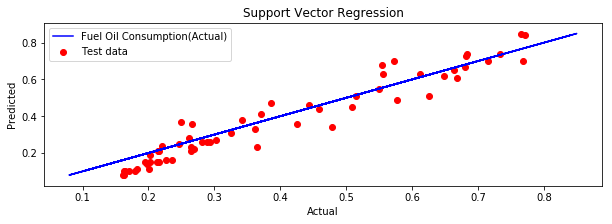

Mean Squared Error(MSE): 0.004157


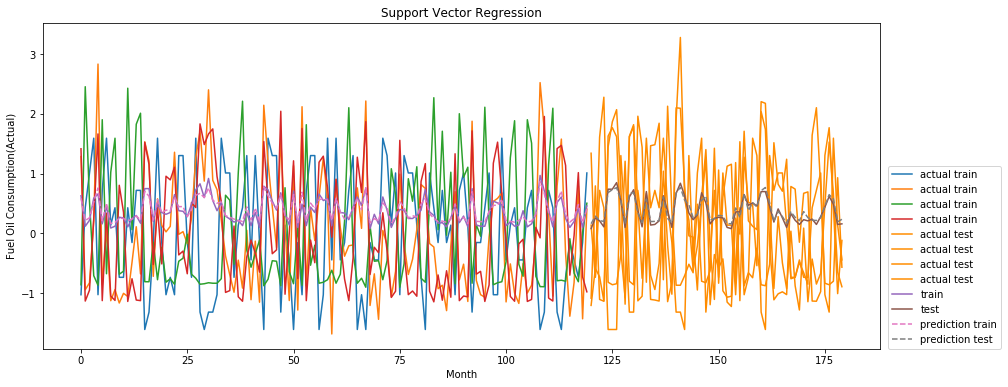

In [12]:
n_train1=120
svr1=svm.SVR(kernel="rbf", gamma=0.1)
svr2=svr1.fit(X_train_scaled,y_train1)
y_pred1=svr1.predict(X_test_scaled)
print(y_pred1)
y_pred_train1=svr1.predict(X_train_scaled)
pyplot.figure(figsize=(10, 3))
lw=2
pyplot.scatter(y_pred1,y_test1,color='red',label='Test data')
pyplot.plot(y_test1,y_test1,color='blue')
pyplot.ylabel('Predicted')
pyplot.xlabel('Actual')
#pyplot.scatter(X_test1,y_test1,color='darkorange',label='Test data')
#pyplot.plot(X_test1,y_pred1,color='navy',lw=lw,label='RBF model')
#pyplot.xlabel('Features')
#pyplot.ylabel('Fuel Oil Consumption(Actual)')
pyplot.title('Support Vector Regression')
pyplot.legend()
pyplot.show()
pyplot.plot(range(n_train1),X_train_scaled,label="actual train")
pyplot.plot(range(n_train1, len(X_test_scaled) + n_train1),X_test_scaled,color='darkorange',label="actual test")
pyplot.plot(range(n_train1), y_train1, label="train")
pyplot.plot(range(n_train1, len(y_test1) + n_train1), y_test1, '-', label="test")
pyplot.plot(range(n_train1), y_pred_train1, '--', label="prediction train")
pyplot.plot(range(n_train1, len(y_test1) + n_train1), y_pred1, '--',label="prediction test")
pyplot.legend(loc=(1.01, 0))
pyplot.xlabel("Month")
pyplot.ylabel("Fuel Oil Consumption(Actual)")
pyplot.title("Support Vector Regression")
error1=mean_squared_error(y_test1,y_pred1)
print('Mean Squared Error(MSE): %.6f' % error1)

In [2]:
series1 = read_csv('output3rd.csv')
X1 = series1.values
print(series1.columns)
print(series1)
print(series1.describe())

Index(['Month', 'Fuel Oil Consumption(Predicted)',
       'Cooling Degree Days U.S. Average', 'Heating Degree Days U.S. Average ',
       'Fuel Oil Consumption(Actual)'],
      dtype='object')
     Month  Fuel Oil Consumption(Predicted)  Cooling Degree Days U.S. Average  \
0        1                         0.894624                          0.009975   
1        2                         1.049869                          0.012469   
2        3                         0.640267                          0.064838   
3        4                         0.428591                          0.064838   
4        5                         0.396877                          0.329177   
5        6                         0.297866                          0.496259   
6        7                         0.400244                          0.725686   
7        8                         0.373951                          0.610973   
8        9                         0.449943                          0.418953 

In [3]:
y1= series1['Fuel Oil Consumption(Actual)']
X1= series1.drop('Fuel Oil Consumption(Actual)',axis = 1)

In [4]:
# TODO: Shuffle and split the data into training and testing subsets
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.33,random_state=10)

In [5]:
scaler = pre.StandardScaler().fit(X_train1)
X_train_scaled = scaler.transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

[ 0.18185947  0.31642727  0.2424426   0.18415914  0.79111087  0.81475206
  0.83916743  0.51655785  0.17362045  0.69024269  0.70157979  0.3296627
  0.20147849  0.60490325  0.20368362  0.2246373   0.22045837  0.61974219
  0.24240188  0.1863016   0.74870597  0.78039221  0.65083791  0.46517555
  0.27365714  0.38038662  0.61050921  0.60547887  0.21653425  0.27082648
  0.33389857  0.33375808  0.17532041  0.17605171  0.47402928  0.26745639
  0.61585913  0.40266837  0.55504552  0.4717345   0.71169594  0.71300123
  0.50501419  0.22351552  0.39905873  0.34058819  0.19909498  0.3775696
  0.30260897  0.21275531  0.35373567  0.28633978  0.2253621   0.21676598
  0.32678653  0.53782902  0.62700251  0.57013254  0.20374537  0.24997636]


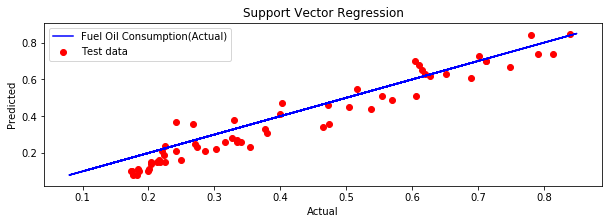

Mean Squared Error(MSE): 0.004814


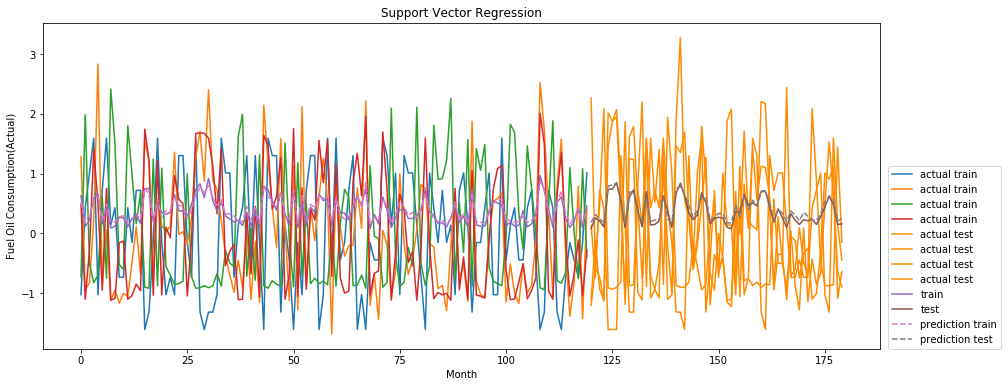

In [6]:
n_train1=120
svr1=svm.SVR(kernel="rbf", gamma=0.1)
svr2=svr1.fit(X_train_scaled,y_train1)
y_pred1=svr1.predict(X_test_scaled)
print(y_pred1)
y_pred_train1=svr1.predict(X_train_scaled)
pyplot.figure(figsize=(10, 3))
lw=2
pyplot.scatter(y_pred1,y_test1,color='red',label='Test data')
pyplot.plot(y_test1,y_test1,color='blue')
pyplot.ylabel('Predicted')
pyplot.xlabel('Actual')
#pyplot.scatter(X_test1,y_test1,color='darkorange',label='Test data')
#pyplot.plot(X_test1,y_pred1,color='navy',lw=lw,label='RBF model')
#pyplot.xlabel('Features')
#pyplot.ylabel('Fuel Oil Consumption(Actual)')
pyplot.title('Support Vector Regression')
pyplot.legend()
pyplot.show()
pyplot.plot(range(n_train1),X_train_scaled,label="actual train")
pyplot.plot(range(n_train1, len(X_test_scaled) + n_train1),X_test_scaled,color='darkorange',label="actual test")
pyplot.plot(range(n_train1), y_train1, label="train")
pyplot.plot(range(n_train1, len(y_test1) + n_train1), y_test1, '-', label="test")
pyplot.plot(range(n_train1), y_pred_train1, '--', label="prediction train")
pyplot.plot(range(n_train1, len(y_test1) + n_train1), y_pred1, '--',label="prediction test")
pyplot.legend(loc=(1.01, 0))
pyplot.xlabel("Month")
pyplot.ylabel("Fuel Oil Consumption(Actual)")
pyplot.title("Support Vector Regression")
error1=mean_squared_error(y_test1,y_pred1)
print('Mean Squared Error(MSE): %.6f' % error1)